In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("housingprice.csv")

In [3]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


(50000, 6)

In [5]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


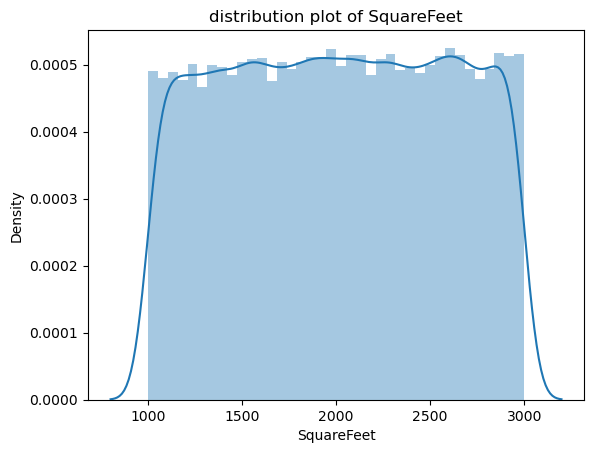

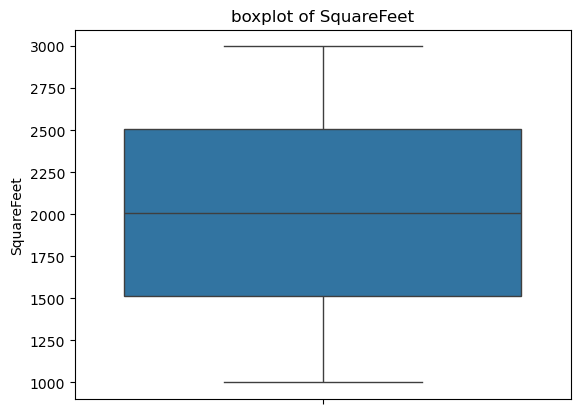

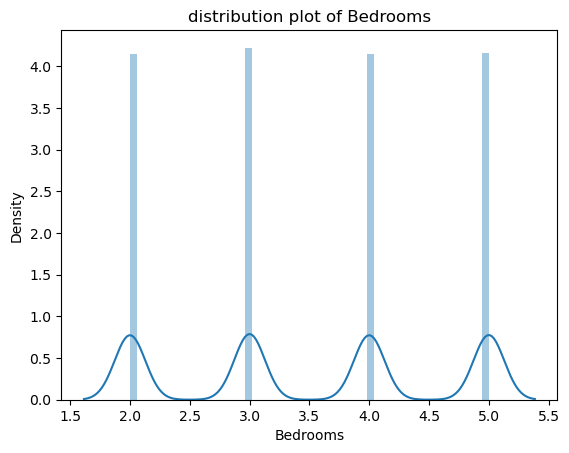

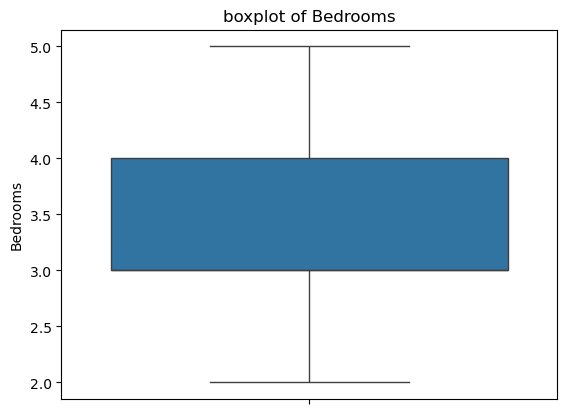

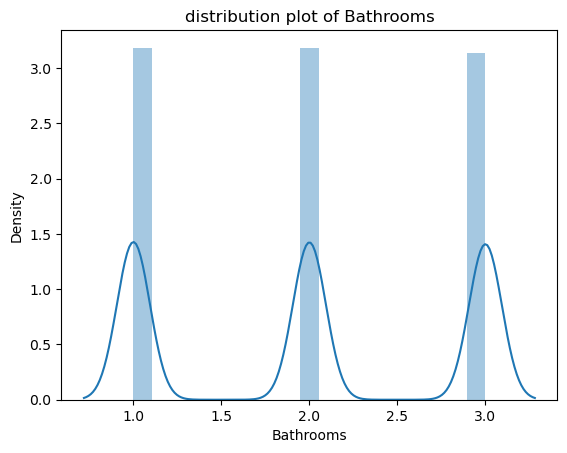

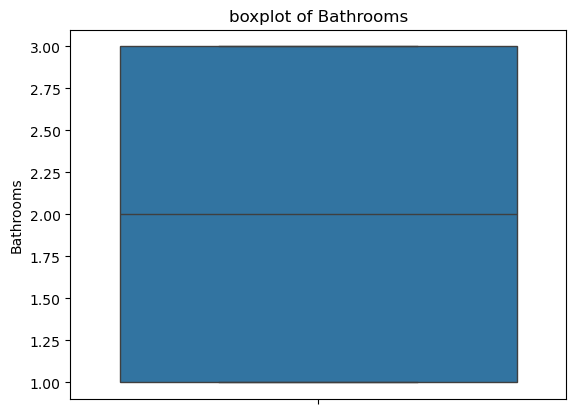

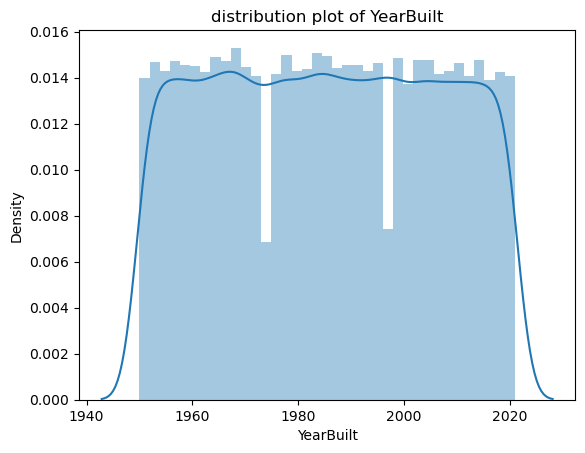

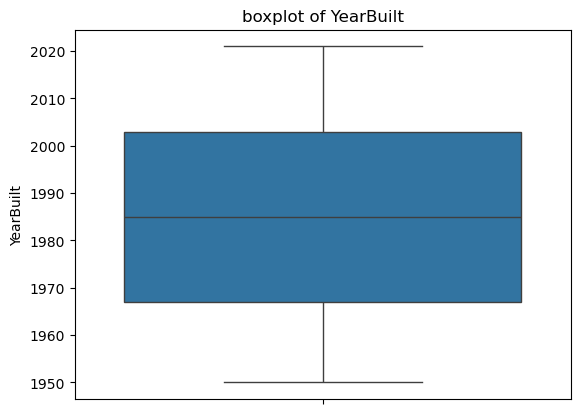

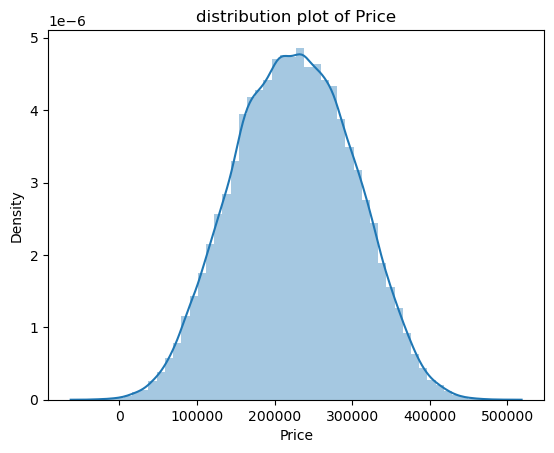

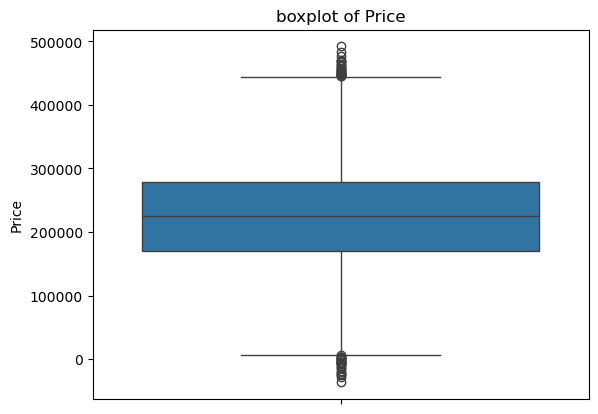

In [6]:
for i in df.select_dtypes(include=["integer","float"]):
    plt.figure()
    sns.distplot(df[i])
    plt.title(f"distribution plot of {i}")
    plt.figure()
    sns.boxplot(df[i])
    plt.title(f"boxplot of {i}")

In [7]:
df["SquareFeet"].describe()

count    50000.000000
mean      2006.374680
std        575.513241
min       1000.000000
25%       1513.000000
50%       2007.000000
75%       2506.000000
max       2999.000000
Name: SquareFeet, dtype: float64

In [8]:
def func_SF(SquareFeet):
    if SquareFeet<2000:
        return "Not Ideal"
    if SquareFeet>=2000 and SquareFeet<=2200:
        return "Bare Minimum"
    else:
        return "Healthy building"
df["Building Measurement"]=df["SquareFeet"].apply(func_SF)

In [9]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Building Measurement
0,2126,4,1,Rural,1969,215355.283618,Bare Minimum
1,2459,3,2,Rural,1980,195014.221626,Healthy building
2,1860,2,1,Suburb,1970,306891.012076,Not Ideal
3,2294,2,1,Urban,1996,206786.787153,Healthy building
4,2130,5,2,Suburb,2001,272436.239065,Bare Minimum
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,Not Ideal
49996,2854,2,2,Suburb,1988,374507.656727,Healthy building
49997,2979,5,3,Suburb,1962,384110.555590,Healthy building
49998,2596,5,2,Rural,1984,380512.685957,Healthy building


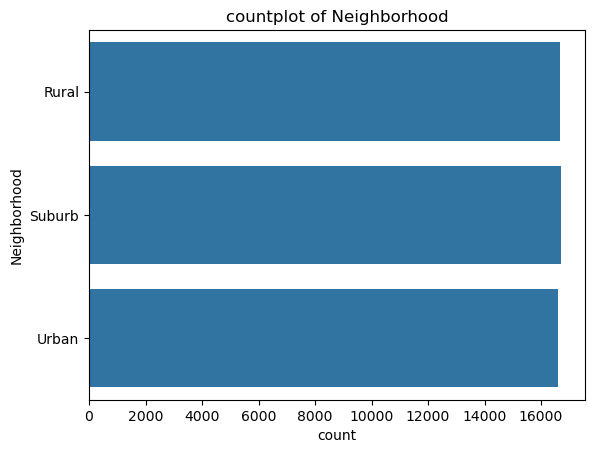

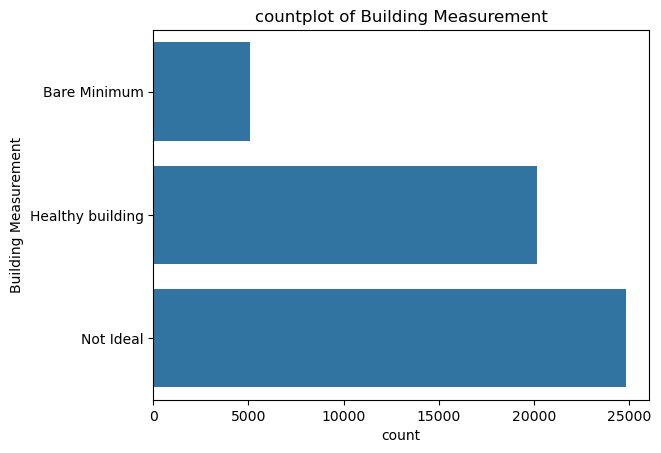

In [10]:
for i in df.select_dtypes(include=["object","bool"]):
    plt.figure()
    sns.countplot(df[i])
    plt.title(f"countplot of {i}")
    plt.show()

In [11]:
price_co= df["Price"].median()
def func_price(Price):
    if Price <= price_co:
        return "Cheap Price"
    if Price > price_co:
        return "Expensive"
df["Pricing Category"]=df["Price"].apply(func_price)

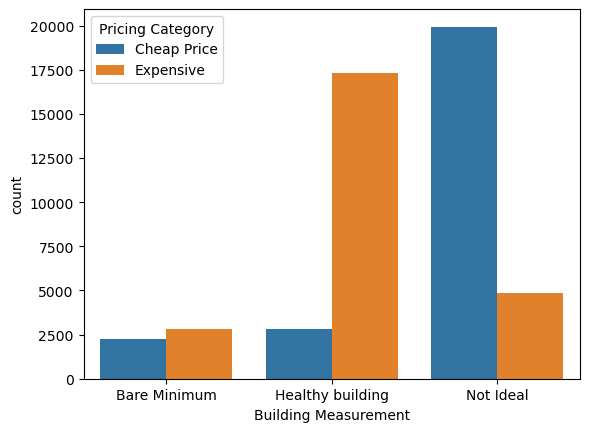

In [12]:
plt.figure()
sns.countplot(x="Building Measurement", hue="Pricing Category", data=df)
plt.show()

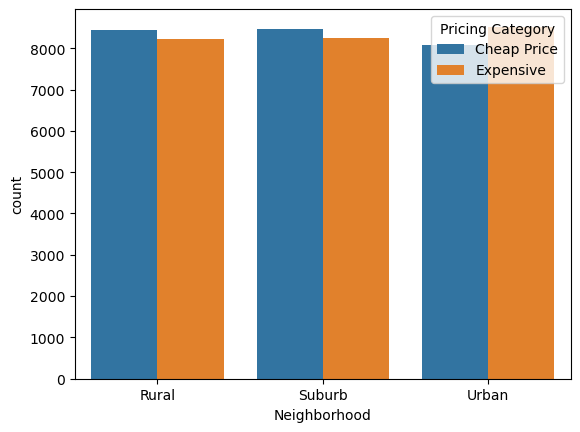

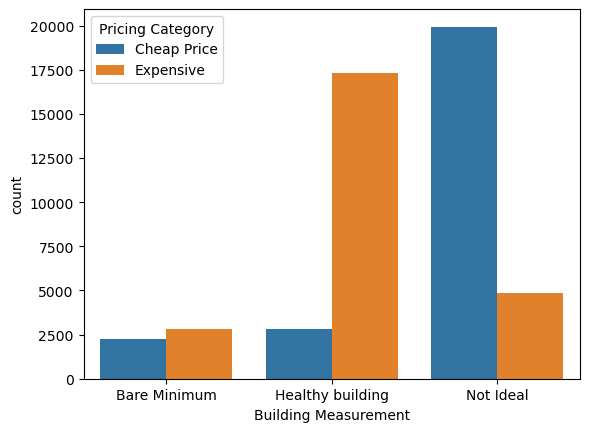

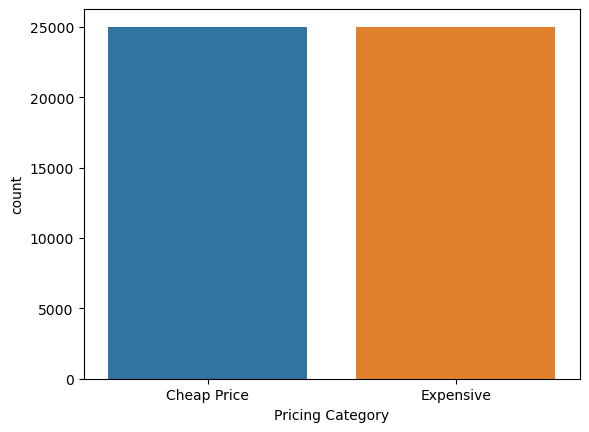

In [13]:
for i in df.select_dtypes(include=["object"]):
    plt.figure()
    sns.countplot(x=i, hue="Pricing Category", data=df)
    plt.show()

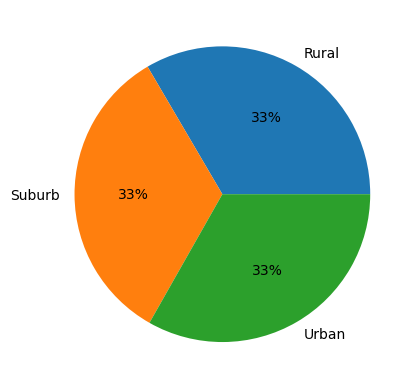

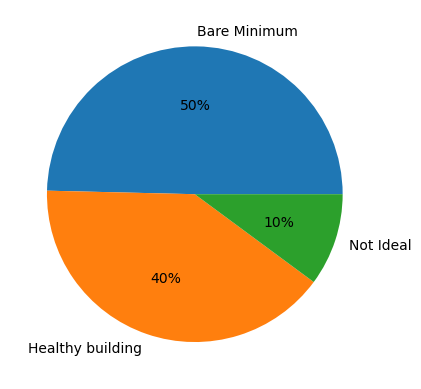

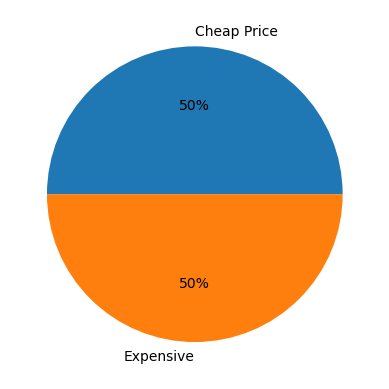

In [14]:
for i in df.select_dtypes(include=["object"]):
    plt.figure()
    plt.pie(df[i].value_counts(), labels=df[i].unique(), autopct="%1.f%%")
    plt.show

In [15]:
#defining x and y
y= df["Pricing Category"]
x= df.drop(columns=["Price", "Pricing Category"])

In [16]:
#binarization and normalization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num=list(x.select_dtypes(include=["float","integer"]))
cat=list(x.select_dtypes(include=["object"]))

In [17]:
pipeline=ColumnTransformer([
    ("num_trans",StandardScaler(),num),
    ("cat_trans",OneHotEncoder(),cat)
])

In [18]:
#new x
new_x=pipeline.fit_transform(x)

In [19]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(new_x,y,train_size=2/3, random_state=44)

In [20]:
from sklearn.linear_model import LogisticRegression
lr_base= LogisticRegression()
lr_base.fit(x_train,y_train)
y_lr_predict=lr_base.predict(x_test)

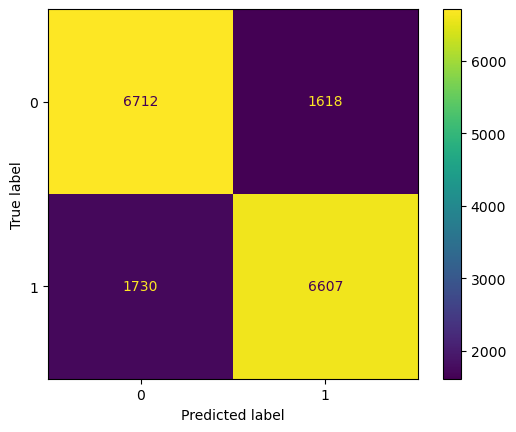

In [21]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
(confusion_matrix(y_test,y_lr_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_lr_predict)).plot()

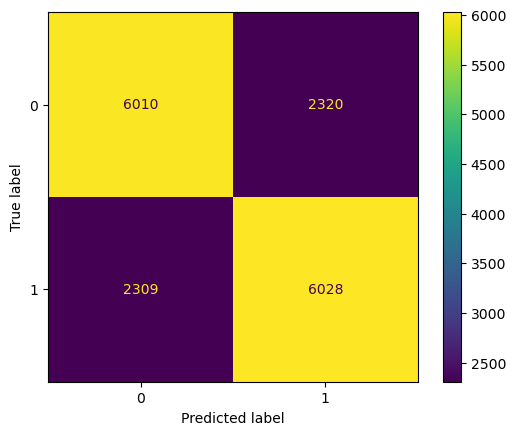

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt_base= DecisionTreeClassifier()
dt_base.fit(x_train,y_train)
y_dt_predict=dt_base.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_dt_predict)).plot()

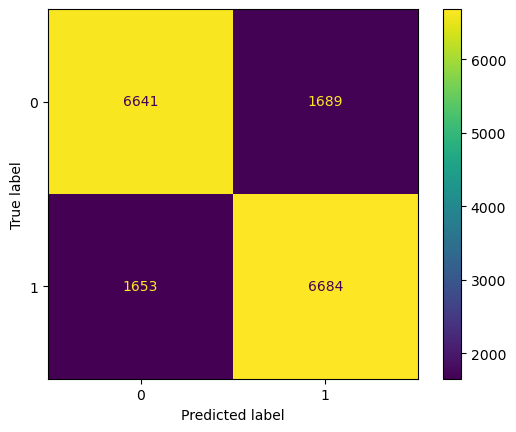

In [23]:
from sklearn.naive_bayes import GaussianNB
nb_base= GaussianNB()
nb_base.fit(x_train,y_train)
y_nb_predict=nb_base.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_nb_predict)).plot()

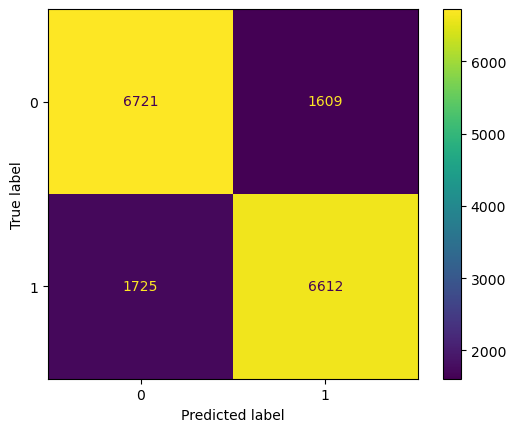

In [26]:
from sklearn import svm
svm_basic=svm.LinearSVC()
svm_basic.fit(x_train,y_train)
y_svm_predict=svm_basic.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_svm_predict)).plot()

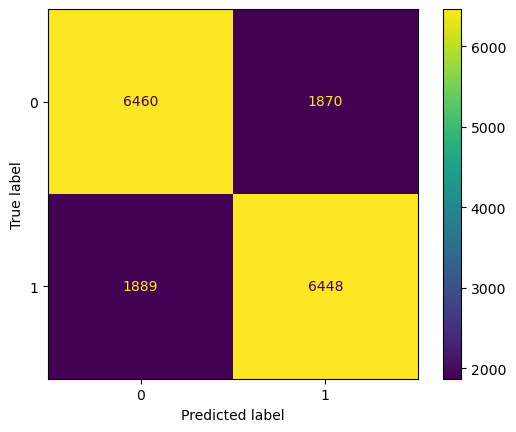

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_base= KNeighborsClassifier()
knn_base.fit(x_train,y_train)
y_predict_knn= knn_base.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict_knn)).plot()

In [41]:
recall_lr= recall_score(y_test, y_lr_predict, pos_label="Cheap Price")
recall_svm= recall_score(y_test, y_svm_predict, pos_label="Cheap Price")
recall_knn= recall_score (y_test, y_predict_knn, pos_label="Cheap Price")
recall_dt= recall_score(y_test, y_dt_predict, pos_label="Cheap Price")
recall_nb= recall_score(y_test,y_nb_predict, pos_label="Cheap Price")

print(f"recall for logreg: {recall_lr}")
print(f"recall for svm: {recall_svm}")
print(f"recall for knn: {recall_knn}")
print(f"recall for dt: {recall_dt}")
print(f"recall for nb: {recall_nb}")

recall for logreg: 0.8057623049219688
recall for svm: 0.8068427370948379
recall for knn: 0.7755102040816326
recall for dt: 0.7214885954381752
recall for nb: 0.7972388955582232
